## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>

This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).

The dataset we use for this part is the [STL10 dataset](https://cs.stanford.edu/~acoates/stl10/) which consists of $5,000$ training images of airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck; each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:

1. `DatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training.
2. `BaseImageClassifier`: A base class image classfication, which is basically a CNN model.

*Note*: You may need to install the package `imutils` if you have not installed yet

Firstly, we need to run the following cells to load required packages.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from A1_S2_2023 import DatasetManager, BaseImageClassifier

Note that the class `DatasetManager` has attributes related to *the training, validation, and testing sets*. You can use them in training your developped models in the sequel.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incompleteHZ8LUJ/stl10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incompleteHZ8LUJ/stl10-test.tfrecord*...:   0%|          | 0/8…

Generating unlabelled examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stl10/1.0.0.incompleteHZ8LUJ/stl10-unlabelled.tfrecord*...:   0%|         …

Dataset stl10 downloaded and prepared to /root/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.


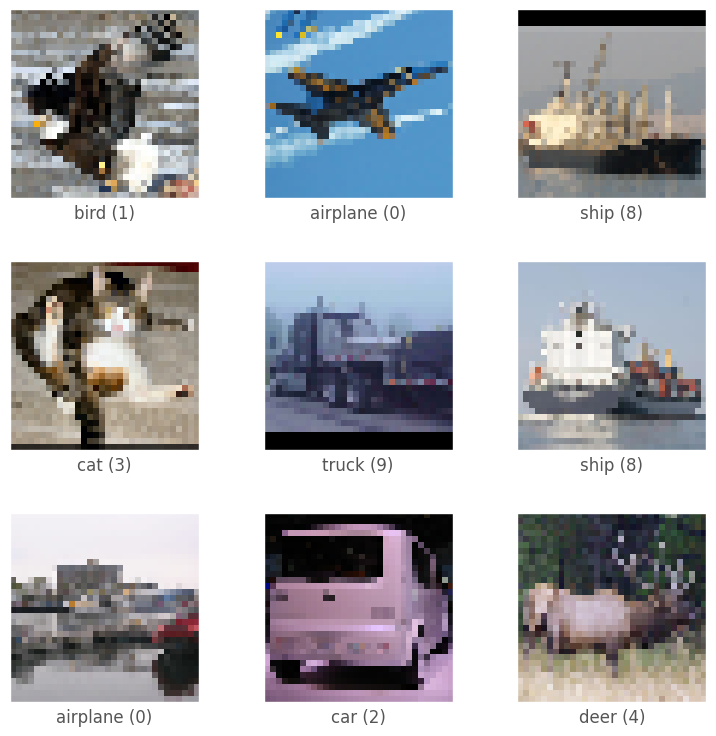

In [ ]:
dataset_name = 'stl10'
# Choose path to store dataset
data_dir = '{}/tensorflow_datasets'.format(os.path.expanduser('~'))

data_manager = DatasetManager(dataset_name, data_dir)
data_manager.load_dataset()
data_manager.preprocess_dataset()
data_manager.show_examples()

In [ ]:
# Choose a random example
import random
num_examples = tf.data.experimental.cardinality(data_manager.ds_train).numpy()
random_index = random.randint(0, num_examples - 1)
example = next(iter(data_manager.ds_train.skip(random_index).take(1)))[0]

# Print the shape and value of the image
print("Image shape:", example.shape)
print("Image value range:", example.numpy().min(), "to", example.numpy().max())

Image shape: (32, 32, 3)
Image value range: 0.09803922 to 0.9647059


In [ ]:
# Check the number of examples in each dataset
print(tf.data.experimental.cardinality(data_manager.ds_train))
print(tf.data.experimental.cardinality(data_manager.ds_val))
print(tf.data.experimental.cardinality(data_manager.ds_test))

tf.Tensor(4500, shape=(), dtype=int64)
tf.Tensor(500, shape=(), dtype=int64)
tf.Tensor(8000, shape=(), dtype=int64)


We now use **BaseImageClassifier** built in the **A1_S2_2023.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated with.

In [ ]:
network1 = BaseImageClassifier(name='network1',
                       num_classes=10,
                       optimizer='sgd',
                       batch_size=128,
                       num_epochs=20,
                       learning_rate=0.001)

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **A1_S2_2023.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [ ]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                          

In [ ]:
x_train_batch = network1.optimize_data_pipeline(data_manager.ds_train, batch_size=32)
x_val_batch = network1.optimize_data_pipeline(data_manager.ds_val, batch_size=32)
network1.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 16s 31ms/step - loss: 2.2981 - accuracy: 0.1222 - val_loss: 2.2889 - val_accuracy: 0.1500
Epoch 2/20
141/141 [==============================] - 1s 5ms/step - loss: 2.2765 - accuracy: 0.1427 - val_loss: 2.2474 - val_accuracy: 0.1940
Epoch 3/20
141/141 [==============================] - 1s 5ms/step - loss: 2.1806 - accuracy: 0.1969 - val_loss: 2.1057 - val_accuracy: 0.2500
Epoch 4/20
141/141 [==============================] - 1s 5ms/step - loss: 2.0548 - accuracy: 0.2629 - val_loss: 1.9850 - val_accuracy: 0.2960
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 1.9539 - accuracy: 0.3029 - val_loss: 1.9003 - val_accuracy: 0.3360
Epoch 6/20
141/141 [==============================] - 1s 4ms/step - loss: 1.8941 - accuracy: 0.3187 - val_loss: 1.8511 - val_accuracy: 0.3460
Epoch 7/20
141/141 [==============================] - 1s 5ms/step - loss: 1.8360 - accuracy: 0.3376 - val_loss: 1.8105 - val_accuracy: 0.3560
Epoc

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training.

In [ ]:
x_test_batch = network1.optimize_data_pipeline(data_manager.ds_test, batch_size=32)
network1.compute_accuracy(x_test_batch)

250/250 [==============================] - 4s 17ms/step - loss: 1.5981 - accuracy: 0.4289
loss: 1.5980982780456543
accuracy: 0.42887499928474426


Below shows how you can inspect the training progress.

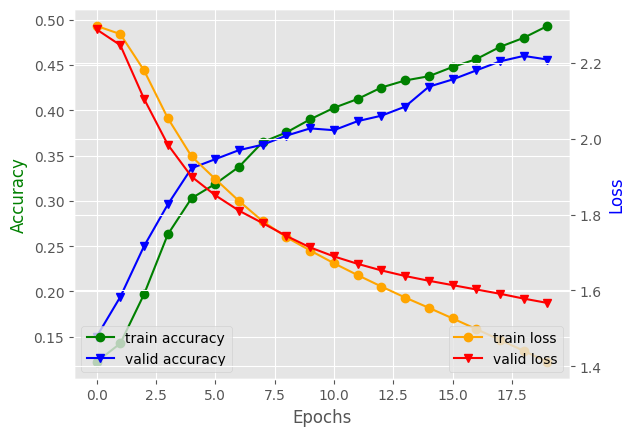

In [ ]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [ ]:
num_samples = 25
sample_dataset = data_manager.ds_test.take(num_samples)
network1.predict(sample_dataset.batch(num_samples), data_manager.ds_info)

1/1 [==============================] - 0s 298ms/step
Sample 1: Predicted label - ship
Sample 2: Predicted label - monkey
Sample 3: Predicted label - cat
Sample 4: Predicted label - bird
Sample 5: Predicted label - ship
Sample 6: Predicted label - dog
Sample 7: Predicted label - deer
Sample 8: Predicted label - cat
Sample 9: Predicted label - airplane
Sample 10: Predicted label - deer
Sample 11: Predicted label - deer
Sample 12: Predicted label - ship
Sample 13: Predicted label - horse
Sample 14: Predicted label - ship
Sample 15: Predicted label - deer
Sample 16: Predicted label - cat
Sample 17: Predicted label - deer
Sample 18: Predicted label - airplane
Sample 19: Predicted label - truck
Sample 20: Predicted label - ship
Sample 21: Predicted label - dog
Sample 22: Predicted label - horse
Sample 23: Predicted label - ship
Sample 24: Predicted label - truck
Sample 25: Predicted label - airplane


Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

1/1 [==============================] - 0s 79ms/step


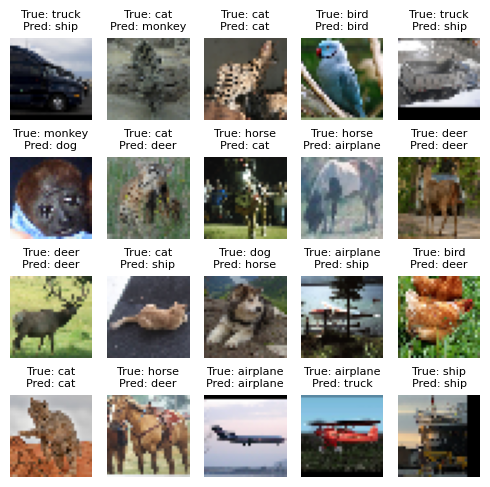

In [ ]:
num_samples = 20
sample_dataset = data_manager.ds_test.take(num_samples)
network1.plot_predictions(sample_dataset, data_manager.ds_info, num_samples=num_samples, grid_shape=(4, 5))

### <span style="color:#0b486b">Question 3.1: Observe the learning curve</span>
After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

The model behaves not too goood. The accuracy for test dataset is only 0.422.

What could be done to immprove:
increase number of epoches,
add skip connection,
add dropout

**For questions 3.2 to 3.9**, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters which you can find in function `__init__()` for the class `BaseImageClassifier`:

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout.
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization.
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

tf.random.set_seed(3181)

### <span style="color:#0b486b">Question 3.2: Define your CNN</span>

Write the code of the `YourModel` class here. Note that this class will be inherited from the `BaseImageClassifier` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.models import Model


class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm=None,
                 is_augmentation=False,
                 activation_func='relu',
                 optimizer='adam',
                 use_skip=True,
                 batch_size=10,
                 num_epochs=20,
                 learning_rate=0.0001,
                 verbose=True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation,
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)

    def custom_block(self, x, filters):
        # skip connection
        shortcut = x

        # First Conv layer
        x = layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        x = layers.Activation(self.activation_func)(x)

        # Second Conv layer
        x = layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)

        # Add the skip connection to the output
        if self.use_skip:
            x = tf.keras.layers.add([shortcut, x])
        x = layers.Activation(self.activation_func)(x)

        # Mean Pooling layer
        x = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")(x)

        # Dropout
        x = layers.Dropout(rate=self.drop_rate)(x)

        return x

    def build_cnn(self):
      input_tensor = layers.Input(shape=(self.height, self.width, self.depth))
      x = input_tensor

      for current_feature_maps in self.feature_maps:
        # Initial convolution
        x = layers.Conv2D(current_feature_maps, (3, 3), padding='same', activation=None)(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        x = layers.Activation(self.activation_func)(x)

        # Second convolution with skip connection
        shortcut = x
        x = layers.Conv2D(current_feature_maps, (3, 3), padding='same', activation=None)(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        if self.use_skip:
            x = layers.Add()([shortcut, x])
        x = layers.Activation(self.activation_func)(x)

        # Mean Pooling and Dropout
        x = layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)
        if self.drop_rate > 0:
            x = layers.Dropout(self.drop_rate)(x)

      x = layers.Flatten()(x)
      x = layers.Dense(self.num_classes, activation='softmax')(x)

      self.model = models.Model(inputs=input_tensor, outputs=x)
      self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



### <span style="color:#0b486b">Question 3.3: Experiment with skip connection</span>
Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

*# WRITE YOUR ANSWER AND OBSERVATION HERE*

.....




In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

my_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0,
                     batch_norm=True,
                     use_skip=True,
                     optimizer='sgd',
                     learning_rate=0.001)
my_network_skip.build_cnn()
my_network_skip.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['batch_normalization[0][0]']

In [ ]:
my_network_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 3s 9ms/step - loss: 1.8172 - accuracy: 0.3380 - val_loss: 2.8307 - val_accuracy: 0.1060
Epoch 2/20
141/141 [==============================] - 1s 9ms/step - loss: 1.3395 - accuracy: 0.5089 - val_loss: 3.2411 - val_accuracy: 0.1680
Epoch 3/20
141/141 [==============================] - 1s 7ms/step - loss: 1.1227 - accuracy: 0.5958 - val_loss: 2.2395 - val_accuracy: 0.2900
Epoch 4/20
141/141 [==============================] - 1s 7ms/step - loss: 0.9691 - accuracy: 0.6582 - val_loss: 1.5108 - val_accuracy: 0.4720
Epoch 5/20
141/141 [==============================] - 1s 7ms/step - loss: 0.8469 - accuracy: 0.7169 - val_loss: 1.3289 - val_accuracy: 0.5520
Epoch 6/20
141/141 [==============================] - 1s 7ms/step - loss: 0.7444 - accuracy: 0.7638 - val_loss: 1.3557 - val_accuracy: 0.5360
Epoch 7/20
141/141 [==============================] - 1s 7ms/step - loss: 0.6531 - accuracy: 0.8058 - val_loss: 1.3614 - val_accuracy: 0.5520
Epoch 

In [ ]:
my_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=3,
                     drop_rate=0.0,
                     batch_norm=True,
                     use_skip=False,
                     optimizer='sgd',
                     learning_rate=0.001)
my_network_no_skip.build_cnn()
my_network_no_skip.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [ ]:
my_network_no_skip.fit(x_train_batch, x_val_batch, num_epochs=20)

Epoch 1/20
141/141 [==============================] - 3s 9ms/step - loss: 1.7145 - accuracy: 0.3591 - val_loss: 2.5450 - val_accuracy: 0.1120
Epoch 2/20
141/141 [==============================] - 1s 6ms/step - loss: 1.3194 - accuracy: 0.5147 - val_loss: 2.6301 - val_accuracy: 0.1600
Epoch 3/20
141/141 [==============================] - 1s 7ms/step - loss: 1.1367 - accuracy: 0.5996 - val_loss: 1.9719 - val_accuracy: 0.3020
Epoch 4/20
141/141 [==============================] - 1s 6ms/step - loss: 0.9927 - accuracy: 0.6609 - val_loss: 1.5810 - val_accuracy: 0.4420
Epoch 5/20
141/141 [==============================] - 1s 6ms/step - loss: 0.8759 - accuracy: 0.7138 - val_loss: 1.5433 - val_accuracy: 0.4580
Epoch 6/20
141/141 [==============================] - 1s 7ms/step - loss: 0.7781 - accuracy: 0.7636 - val_loss: 1.9402 - val_accuracy: 0.4120
Epoch 7/20
141/141 [==============================] - 1s 8ms/step - loss: 0.6990 - accuracy: 0.7980 - val_loss: 2.0749 - val_accuracy: 0.4020
Epoch 

The new model works apparently much much better.
The originnal accuracy was only around 0.422

with skip, the accuracy becomes 0.612 impressive
without skip, the accuracy becomes 0.564

It improves, but seems not much.
And apparently, there is overfitting issue as accuracy is much higher than the val_accuracy

### <span style="color:#0b486b">Question 3.4: Tune hyperparameters with grid search</span>

Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*# REPORT THE BEST PARAMETERS AND THE TESTING ACCURACY HERE*

.....

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
best_accuracy = 0
best_model = None
best_params = {}



#set up different parameters for number_blocks, skip, and learning rate
for blocks in [2, 3, 4]:
    for skip in [True, False]:
        for lr in [0.001, 0.0001]:
            print(f"Training model with num_blocks={blocks}, use_skip={skip}, and learning_rate={lr}")

            model_3_4=YourModel(name='q3_4',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=blocks,
                     drop_rate=0.0,
                     batch_norm=True,
                     use_skip=skip,
                     optimizer='sgd',
                     learning_rate=lr)



            model_3_4.build_cnn()
            model_3_4.fit(x_train_batch, x_val_batch,num_epochs=20)

            val_accuracy = max(model_3_4.history.history['val_accuracy'])
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model_3_4
                best_params = {
                    "num_blocks": blocks,
                    "use_skip": skip,
                    "learning_rate": lr
                }

print(f"Best validation accuracy is {best_accuracy} with params: {best_params}")



Training model with num_blocks=2, use_skip=True, and learning_rate=0.001
Epoch 1/20
141/141 [==============================] - 3s 8ms/step - loss: 1.9165 - accuracy: 0.3236 - val_loss: 2.7488 - val_accuracy: 0.0920
Epoch 2/20
141/141 [==============================] - 1s 6ms/step - loss: 1.3802 - accuracy: 0.4924 - val_loss: 2.7620 - val_accuracy: 0.1980
Epoch 3/20
141/141 [==============================] - 1s 5ms/step - loss: 1.1641 - accuracy: 0.5789 - val_loss: 2.1526 - val_accuracy: 0.3280
Epoch 4/20
141/141 [==============================] - 1s 5ms/step - loss: 1.0179 - accuracy: 0.6398 - val_loss: 1.7824 - val_accuracy: 0.4180
Epoch 5/20
141/141 [==============================] - 1s 5ms/step - loss: 0.9008 - accuracy: 0.6876 - val_loss: 1.6467 - val_accuracy: 0.4600
Epoch 6/20
141/141 [==============================] - 1s 5ms/step - loss: 0.8078 - accuracy: 0.7273 - val_loss: 1.7132 - val_accuracy: 0.4660
Epoch 7/20
141/141 [==============================] - 1s 5ms/step - loss: 0

Result: The best validation accuracy is 0.598 with num_blocks=4, use_skip=true,learning_rate=0.001

comments: the next time I run the same code, the result changes to: num_block=3,use_skip=True,Learning_rate=0.001. validation accuracy becomes 0.616

It is noticed that the overfitting problem has been solved a bit


### <span style="color:#0b486b">Question 3.5: Apply data augmentation</span>

We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [ ]:
import numpy as np
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation,
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)

    def custom_block(self, x, filters):
        # skip connection
        shortcut = x

        # First Conv layer
        x = layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        x = layers.Activation(self.activation_func)(x)

        # Second Conv layer
        x = layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)

        # Add the shortcut to the output
        if self.use_skip:
            x = tf.keras.layers.add([shortcut, x])
        x = layers.Activation(self.activation_func)(x)

        # Mean Pooling layer
        x = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")(x)

        # Dropout
        x = layers.Dropout(rate=self.drop_rate)(x)

        return x

    def build_cnn(self):
      input_tensor = layers.Input(shape=(self.height, self.width, self.depth))
      x = input_tensor

      for current_feature_maps in self.feature_maps:
        # Initial convolution
        x = layers.Conv2D(current_feature_maps, (3, 3), padding='same', activation=None)(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        x = layers.Activation(self.activation_func)(x)

        # Second convolution with skip connection
        shortcut = x
        x = layers.Conv2D(current_feature_maps, (3, 3), padding='same', activation=None)(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        if self.use_skip:
            x = layers.Add()([shortcut, x])
        x = layers.Activation(self.activation_func)(x)

        # Mean Pooling and Dropout
        x = layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)
        if self.drop_rate > 0:
            x = layers.Dropout(self.drop_rate)(x)

      x = layers.Flatten()(x)
      x = layers.Dense(self.num_classes, activation='softmax')(x)

      self.model = models.Model(inputs=input_tensor, outputs=x)
      self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



    def fit(self, data_manager, batch_size=None, num_epochs=None):
      batch_size = self.batch_size if batch_size is None else batch_size
      num_epochs = self.num_epochs if num_epochs is None else num_epochs

      x_train_batch = self.optimize_data_pipeline(data_manager.ds_train, batch_size=batch_size)
      x_val_batch = self.optimize_data_pipeline(data_manager.ds_val, batch_size=batch_size)

      if self.is_augmentation:#added code for data augmentation
        train_data_list, train_labels_list = [], []
        for data, labels in x_train_batch:
            train_data_list.append(data.numpy())
            train_labels_list.append(labels.numpy())

        train_data = np.concatenate(train_data_list, axis=0)
        train_labels = np.concatenate(train_labels_list, axis=0)

        datagen = ImageDataGenerator(rotation_range=10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     horizontal_flip=True)#data augmentation

        datagen.fit(train_data)

        self.model.fit(datagen.flow(train_data, train_labels, batch_size=self.batch_size),
                       validation_data=x_val_batch,
                       epochs=self.num_epochs,
                       verbose=self.verbose)
      else:
        self.model.fit(x_train_batch, validation_data=x_val_batch, epochs=self.num_epochs, batch_size=self.batch_size, verbose=self.verbose)

In [ ]:
model_3_5=YourModel(name='q3_5',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=4,
                     drop_rate=0.0,
                     batch_norm=True,
                     is_augmentation=True,
                     use_skip=True,
                     optimizer='sgd',
                     learning_rate=0.001)


model_3_5.build_cnn()
model_3_5.fit(data_manager)

Epoch 1/20
450/450 [==============================] - 9s 12ms/step - loss: 2.0184 - accuracy: 0.3062 - val_loss: 1.7373 - val_accuracy: 0.3420
Epoch 2/20
450/450 [==============================] - 6s 14ms/step - loss: 1.6659 - accuracy: 0.4024 - val_loss: 1.5998 - val_accuracy: 0.3980
Epoch 3/20
450/450 [==============================] - 5s 11ms/step - loss: 1.5359 - accuracy: 0.4438 - val_loss: 1.6073 - val_accuracy: 0.3860
Epoch 4/20
450/450 [==============================] - 6s 12ms/step - loss: 1.4367 - accuracy: 0.4691 - val_loss: 1.4128 - val_accuracy: 0.4860
Epoch 5/20
450/450 [==============================] - 6s 12ms/step - loss: 1.3578 - accuracy: 0.5047 - val_loss: 1.3745 - val_accuracy: 0.4980
Epoch 6/20
450/450 [==============================] - 5s 12ms/step - loss: 1.2977 - accuracy: 0.5216 - val_loss: 1.7192 - val_accuracy: 0.4480
Epoch 7/20
450/450 [==============================] - 6s 14ms/step - loss: 1.2417 - accuracy: 0.5478 - val_loss: 1.1789 - val_accuracy: 0.5520

### <span style="color:#0b486b">Question 3.6: Observe model performance with data augmentation</span>

Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and not using it.
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

From the observation, in terms of the val_accuracy, it is 0.588, not improved a lot.
but I noticed that, without data augmentation, the accuracy is almost 1 while val_accuracy is only around 0.6, which meaning that there was a huge overfitting issue.

With the data augmentation, although validation accuracy does not improve a lot, the accuracy downs to 0.7142, meaning that the overfitting issue has been improved a lot

### <span style="color:#0b486b">Question 3.7: Explore data mixup technique</span>

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
import numpy as np
class YourModel(BaseImageClassifier):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4,
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation,
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)

    def custom_block(self, x, filters):
        # skip connection
        shortcut = x

        # First Conv layer
        x = layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        x = layers.Activation(self.activation_func)(x)

        # Second Conv layer
        x = layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)

        # Add the shortcut to the output
        if self.use_skip:
            x = tf.keras.layers.add([shortcut, x])
        x = layers.Activation(self.activation_func)(x)

        # Mean Pooling layer
        x = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")(x)

        # Dropout
        x = layers.Dropout(rate=self.drop_rate)(x)

        return x

    def build_cnn(self):
      input_tensor = layers.Input(shape=(self.height, self.width, self.depth))
      x = input_tensor

      for current_feature_maps in self.feature_maps:
        # Initial convolution
        x = layers.Conv2D(current_feature_maps, (3, 3), padding='same', activation=None)(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        x = layers.Activation(self.activation_func)(x)

        # Second convolution with skip connection
        shortcut = x
        x = layers.Conv2D(current_feature_maps, (3, 3), padding='same', activation=None)(x)
        if self.batch_norm:
            x = layers.BatchNormalization()(x)
        if self.use_skip:
            x = layers.Add()([shortcut, x])
        x = layers.Activation(self.activation_func)(x)

        # Mean Pooling and Dropout
        x = layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)
        if self.drop_rate > 0:
            x = layers.Dropout(self.drop_rate)(x)

      x = layers.Flatten()(x)
      x = layers.Dense(self.num_classes, activation='softmax')(x)

      self.model = models.Model(inputs=input_tensor, outputs=x)
      self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def generate_mixup_data(self,x, y, alpha=0.2):
      """
      Apply mixup technique
      """
      if alpha > 0:
        lam = np.random.beta(alpha, alpha)
      else:
        lam = 1

      batch_size = x.shape[0]
      index = np.random.permutation(batch_size)

      mixed_x = lam * x + (1 - lam) * x[index]#mixup
      mixed_y = lam * y + (1 - lam) * y[index]#mixup

      return mixed_x, mixed_y



    def fit(self, data_manager, batch_size=None, num_epochs=None, use_mixup=False, alpha=0.2):
      batch_size = self.batch_size if batch_size is None else batch_size
      num_epochs = self.num_epochs if num_epochs is None else num_epochs

      x_train_batch = self.optimize_data_pipeline(data_manager.ds_train, batch_size=batch_size)
      x_val_batch = self.optimize_data_pipeline(data_manager.ds_val, batch_size=batch_size)

      if self.is_augmentation:#code for data augmentation
        train_data_list, train_labels_list = [], []
        for data, labels in x_train_batch:
            train_data_list.append(data.numpy())
            train_labels_list.append(labels.numpy())

        train_data = np.concatenate(train_data_list, axis=0)
        train_labels = np.concatenate(train_labels_list, axis=0)

        datagen = ImageDataGenerator(rotation_range=10,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     horizontal_flip=True)

        datagen.fit(train_data)

        self.model.fit(datagen.flow(train_data, train_labels, batch_size=self.batch_size),
                       validation_data=x_val_batch,
                       epochs=self.num_epochs,
                       verbose=self.verbose)

      if use_mixup:
        for epoch in range(num_epochs):
            for step, (x_batch, y_batch) in enumerate(x_train_batch):
                # Apply mixup
                mixed_x, mixed_y = self.generate_mixup_data(x_batch.numpy(), y_batch.numpy(), alpha=alpha)

                # Training step
                self.model.train_on_batch(mixed_x, mixed_y)
      else:
        self.model.fit(x_train_batch, validation_data=x_val_batch, epochs=self.num_epochs, batch_size=self.batch_size, verbose=self.verbose)


In [ ]:
model_3_7=YourModel(name='q3_7',
                     feature_maps=32,
                     num_classes=data_manager.n_classes,
                     num_blocks=4,
                     drop_rate=0.0,
                     batch_norm=True,
                     is_augmentation=True,
                     use_skip=True,
                     optimizer='sgd',
                     learning_rate=0.001)


model_3_7.build_cnn()
model_3_7.fit(data_manager,use_mixup=True)

Epoch 1/20
450/450 [==============================] - 9s 13ms/step - loss: 2.0255 - accuracy: 0.2962 - val_loss: 2.0315 - val_accuracy: 0.3100
Epoch 2/20
450/450 [==============================] - 6s 13ms/step - loss: 1.6694 - accuracy: 0.3902 - val_loss: 1.5157 - val_accuracy: 0.4380
Epoch 3/20
450/450 [==============================] - 6s 13ms/step - loss: 1.5102 - accuracy: 0.4531 - val_loss: 2.1353 - val_accuracy: 0.3340
Epoch 4/20
450/450 [==============================] - 5s 12ms/step - loss: 1.4502 - accuracy: 0.4640 - val_loss: 1.8327 - val_accuracy: 0.4120
Epoch 5/20
450/450 [==============================] - 6s 13ms/step - loss: 1.3412 - accuracy: 0.5102 - val_loss: 1.9333 - val_accuracy: 0.3320
Epoch 6/20
450/450 [==============================] - 5s 11ms/step - loss: 1.2960 - accuracy: 0.5253 - val_loss: 1.2722 - val_accuracy: 0.5240
Epoch 7/20
450/450 [==============================] - 6s 14ms/step - loss: 1.2365 - accuracy: 0.5409 - val_loss: 1.7553 - val_accuracy: 0.4080

Result: "loss: 0.7928 - accuracy: 0.7131 - val_loss: 1.0881 - val_accuracy: 0.6220"

It is noticed that val_accuracy improves.

In [ ]:
#######The following code is just for further fine tuning the parameters############

# try to further fine tune the parameters to find the best combination
drop_rates = [0.0, 0.2, 0.5]
optimizers = ['sgd', 'adam', 'rmsprop']
alphas = [0.1, 0.2, 0.5]

# Placeholder
best_params = None
best_val_accuracy = 0

# Iterate over all combinations
for drop_rate in drop_rates:
    for optimizer in optimizers:
        for alpha in alphas:
            # Create a model with the current parameter combination
            model_3_7_2 = YourModel(name='q3_7_2',
                              feature_maps=32,
                              num_classes=data_manager.n_classes,
                              num_blocks=4,
                              drop_rate=drop_rate,
                              batch_norm=True,
                              is_augmentation=True,
                              use_skip=True,
                              optimizer=optimizer,
                              learning_rate=0.001)

            # Build and train the model
            model_3_7_2.build_cnn()
            model_3_7_2.fit(data_manager, use_mixup=True, alpha=alpha)

            # Evaluate the model on the validation set
            val_accuracy = max(model_3_7_2.model.history.history['val_accuracy'])

            # Check if this performance is the best so far
            if val_accuracy> best_val_accuracy:
                best_val_performance = val_accuracy
                best_params = {'drop_rate': drop_rate, 'optimizer': optimizer, 'alpha': alpha}


print("Best Parameters:", best_params)
print("Best Validation Performance:", best_val_accuracy)


Epoch 1/20
450/450 [==============================] - 9s 13ms/step - loss: 2.0354 - accuracy: 0.3029 - val_loss: 1.7770 - val_accuracy: 0.3340
Epoch 2/20
450/450 [==============================] - 6s 13ms/step - loss: 1.7012 - accuracy: 0.3849 - val_loss: 1.5626 - val_accuracy: 0.4180
Epoch 3/20
450/450 [==============================] - 5s 12ms/step - loss: 1.5254 - accuracy: 0.4424 - val_loss: 1.7653 - val_accuracy: 0.3640
Epoch 4/20
450/450 [==============================] - 6s 14ms/step - loss: 1.4283 - accuracy: 0.4678 - val_loss: 1.5592 - val_accuracy: 0.4520
Epoch 5/20
450/450 [==============================] - 5s 12ms/step - loss: 1.3566 - accuracy: 0.5080 - val_loss: 1.5697 - val_accuracy: 0.4660
Epoch 6/20
450/450 [==============================] - 6s 13ms/step - loss: 1.2920 - accuracy: 0.5360 - val_loss: 1.3516 - val_accuracy: 0.5020
Epoch 7/20
450/450 [==============================] - 5s 12ms/step - loss: 1.2373 - accuracy: 0.5447 - val_loss: 1.2674 - val_accuracy: 0.5360

In [ ]:
print(best_val_performance)

0.527999997138977


parameters: {'drop_rate': 0.5, 'optimizer': 'rmsprop', 'alpha': 0.5}
validation accuracy:0.528

In [ ]:
model_3_7_3 = YourModel(name='q3_7_3',
                              feature_maps=32,
                              num_classes=data_manager.n_classes,
                              num_blocks=4,
                              drop_rate=0.5,
                              batch_norm=True,
                              is_augmentation=True,
                              use_skip=True,
                              optimizer='rmsprop',
                              num_epochs=100,
                              learning_rate=0.001)

            # Build and train the model
model_3_7_3.build_cnn()
model_3_7_3.fit(data_manager, use_mixup=True, alpha=0.5)

Epoch 1/100
450/450 [==============================] - 10s 13ms/step - loss: 2.5998 - accuracy: 0.2149 - val_loss: 2.2869 - val_accuracy: 0.2760
Epoch 2/100
450/450 [==============================] - 6s 14ms/step - loss: 2.0635 - accuracy: 0.2860 - val_loss: 4.0022 - val_accuracy: 0.2400
Epoch 3/100
450/450 [==============================] - 6s 12ms/step - loss: 1.9129 - accuracy: 0.3156 - val_loss: 2.3024 - val_accuracy: 0.3080
Epoch 4/100
450/450 [==============================] - 6s 14ms/step - loss: 1.7950 - accuracy: 0.3300 - val_loss: 1.6124 - val_accuracy: 0.3740
Epoch 5/100
450/450 [==============================] - 6s 12ms/step - loss: 1.7564 - accuracy: 0.3529 - val_loss: 1.6863 - val_accuracy: 0.3440
Epoch 6/100
450/450 [==============================] - 6s 13ms/step - loss: 1.6869 - accuracy: 0.3771 - val_loss: 1.5898 - val_accuracy: 0.3840
Epoch 7/100
450/450 [==============================] - 6s 14ms/step - loss: 1.6699 - accuracy: 0.3789 - val_loss: 1.5121 - val_accuracy

The best model so far parameter is: num_block=4, dropout=0.5, alpha =0.5,num_epoch=100,optimizer='rmsprop',learning_rate=0.001,use_skip=True,is_augmentation=True,mixup=True. Validation accuracy=0.636

In [ ]:
model_3_7_3.model.save("model_3_7_3.h5")#save the model, and this is the best model found so far

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model_3_7_3.h5")

In [ ]:
num_samples = 25
sample_dataset = data_manager.ds_test.take(num_samples)
model_3_7_3.predict(sample_dataset.batch(num_samples), data_manager.ds_info)# test the model on test dataset

1/1 [==============================] - 1s 641ms/step
Sample 1: Predicted label - car
Sample 2: Predicted label - cat
Sample 3: Predicted label - cat
Sample 4: Predicted label - bird
Sample 5: Predicted label - monkey
Sample 6: Predicted label - cat
Sample 7: Predicted label - cat
Sample 8: Predicted label - dog
Sample 9: Predicted label - horse
Sample 10: Predicted label - deer
Sample 11: Predicted label - deer
Sample 12: Predicted label - cat
Sample 13: Predicted label - dog
Sample 14: Predicted label - ship
Sample 15: Predicted label - deer
Sample 16: Predicted label - deer
Sample 17: Predicted label - dog
Sample 18: Predicted label - airplane
Sample 19: Predicted label - airplane
Sample 20: Predicted label - monkey
Sample 21: Predicted label - horse
Sample 22: Predicted label - dog
Sample 23: Predicted label - ship
Sample 24: Predicted label - airplane
Sample 25: Predicted label - airplane


1/1 [==============================] - 0s 78ms/step


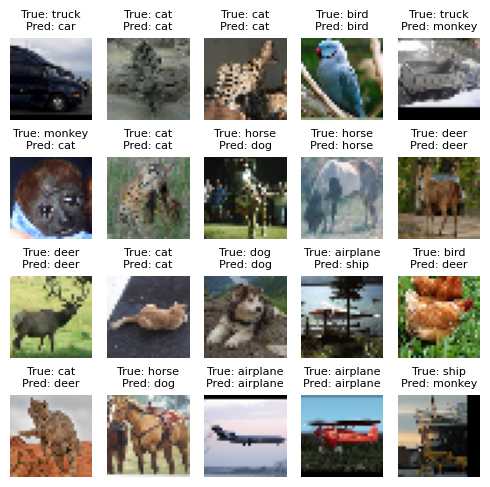

In [ ]:
num_samples = 20
sample_dataset = data_manager.ds_test.take(num_samples)
model_3_7_3.plot_predictions(sample_dataset, data_manager.ds_info, num_samples=num_samples, grid_shape=(4, 5))#visualize the model on test dataset

In conclusion: the best model found so far is:
number of block:4
learning rate:0.001
use skip_connection
use data_augmentation
dropout=0.5
alpha for mixup=0.5
optimizer:rmsprop
number of epoches:100

And best model found has been saved to "model_3_7_3.h5"

For questions **3.8 and 3.9**, you can reuse code in lectures or labs. You should not use third-party libraries such as ClevenHans.

### <span style="color:#0b486b">Question 3.8: Attack your model</span>

Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


### <span style="color:#0b486b">Question 3.9: Train a robust model</span>

Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try.

### <span style="color:#0b486b">Question 3.10</span> (bonus question)

Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this technique to the best obtained model and report the results. For the purpose of implementing SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary


---
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**